Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


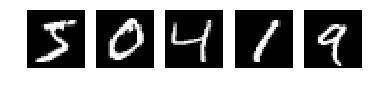

In [1]:
import numpy as np

# Keras has built-in mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot as plt

%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

fig = plt.figure()

for i in range(5):
    fig.add_subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
 
plt.show()

In [8]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding. See https://keras.io/utils/#to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


## 作業

請大家試著用RNN系列模型，努力讓MNIST的 Test accuracy 到達95%以上吧

In [10]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LSTM ,Activation ,Dropout

K.clear_session()

model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=16, epochs=5, validation_split=0.2)
print('Test accuracy:', model.evaluate(x_test, y_test)[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 115s 2ms/step - loss: 2.1048 - acc: 0.2388 - val_loss: 1.5389 - val_acc: 0.5190
Epoch 2/5
48000/48000 [==============================] - 113s 2ms/step - loss: 1.0204 - acc: 0.6502 - val_loss: 0.4194 - val_acc: 0.8737
Epoch 3/5
48000/48000 [==============================] - 113s 2ms/step - loss: 0.4096 - acc: 0.8761 - val_loss: 0.1907 - val_acc: 0.9416
Epoch 4/5
48000/48000 [==============================] - 114s 2ms/step - loss: 0.2456 - acc: 0.9299 - val_loss: 0.1393 - val_acc: 0.9593
Epoch 5/5
10000/10000 [==============================] - 3s 349us/step
Test accuracy: 0.9625
